In [42]:
#Import Libraries
import pandas as pd
import numpy as np
import datetime
import os

######### SETTINGS #########

#E0 is premiership ,I1 is Serie A, SP1 is Liga, D1 is Bundesliga, F1 is Ligue 1...
division_list = ['E0','I1','SP1','D1','F1']

#Season
season = '2021' # 2021 = season 2020/2021, 1920 = season 2019/2020...

#Custom team stats
custom_HomeTeam = 'Bayern Munich'
custom_AwayTeam = 'Dortmund'


######### END SETTINGS #########

In [ ]:
#Output columns
output_columns = ['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','FTG','FTG-HTG','HTHG','HTAG','HTR','HTG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']


print('Start download data from football-data.co.uk')
data = pd.DataFrame()

for division in division_list:
    #Create dataframe to store results
    football_data_url = 'https://www.football-data.co.uk/mmz4281/'+season+'/'+division+'.csv'
    print('downloading... '+football_data_url)
    #Create list of columns, as some files have extra columns in rows that throw error
    cols = (pd.read_csv(football_data_url, nrows=1)).columns.tolist()
    #There are special characters in the file, so using encoding='latin1' below works
    data_div = pd.read_csv(football_data_url, parse_dates=['Date'], dayfirst=True, usecols = cols,encoding='latin1')
    data = pd.concat([data, data_div], axis=0, sort = False).reset_index(drop = True)
    #Find empty columns
    empty_cols = [col for col in data.columns if data[col].isnull().all()]
    #Drop empty columns
    data.drop(empty_cols, axis=1, inplace=True)
    #Remove rows where date is empty
    data = data[pd.notnull(data['Date'])]
    #Reset Index
    data = data.reset_index(drop=True)

    
print('End download data')

print('Start preprocessing')
#Sort data by date
data.sort_values(by=['Date'], inplace=True)

#Add new columns HTG, FTG, FTG-HTG
data['HTG'] = data['HTHG'] + data['HTAG']
data['FTG'] = data['FTHG'] + data['FTAG']
data['FTG-HTG'] = data['FTG'] - data['HTG']

#Filter columns
data = data[output_columns]

print('End preprocessing')



League stats


<AxesSubplot:xlabel='Div'>

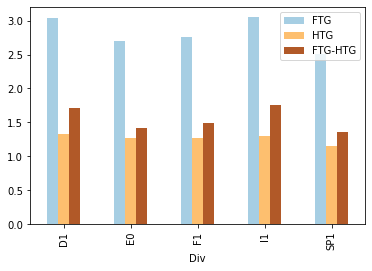

In [49]:
print('League stats')
#Grouping by division
dataLeagueGrouped = data.groupby(['Div']).mean()
#Average Match Goals
dataLeagueGrouped[['FTG','HTG','FTG-HTG']].plot(kind='bar', colormap='Paired')



<AxesSubplot:xlabel='HomeTeam'>

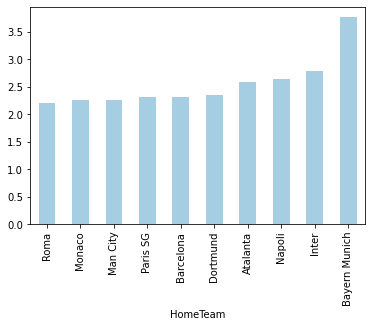

In [38]:
print('HomeTeam stats')

#Grouping by HomeTeam
dataHomeTeamGrouped = data.groupby(['HomeTeam']).mean()
dataHomeTeamGrouped.sort_values(by=['FTHG'], inplace=True)
dataHomeTeamGrouped = dataHomeTeamGrouped.tail(10)
#Average Home Team Match Goals
dataHomeTeamGrouped['FTHG'].plot(kind='bar', colormap='Paired')



<AxesSubplot:xlabel='AwayTeam'>

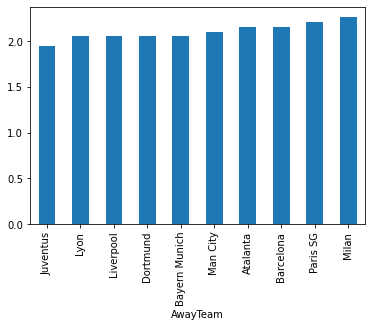

In [41]:
print('AwayTeam stats')

#Grouping by AwayTeam
dataAwayTeamGrouped = data.groupby(['AwayTeam']).mean()
dataAwayTeamGrouped.sort_values(by=['FTAG'], inplace=True)
dataAwayTeamGrouped = dataAwayTeamGrouped.tail(10)
#Average AwayTeam Match Goals
dataAwayTeamGrouped['FTAG'].plot(kind='bar')



In [50]:
#Analize custom HomeTeam vs AwayTeam

dataHomeTeamGrouped = data.loc[(data.HomeTeam == custom_HomeTeam)].groupby(['HomeTeam']).mean()
dataAwayTeamGrouped = data.loc[(data.AwayTeam == custom_AwayTeam)].groupby(['AwayTeam']).mean()

print('Average values HomeTeam: ' + custom_HomeTeam)
print(dataHomeTeamGrouped)
print('**************************')
print('Average values AwayTeam: ' + custom_AwayTeam)
print(dataAwayTeamGrouped)


Average values HomeTeam: Bayern Munich
                   FTHG      FTAG  FTG   FTG-HTG      HTHG      HTAG  \
HomeTeam                                                               
Bayern Munich  3.764706  1.235294  5.0  2.588235  1.764706  0.647059   

                    HTG         HS        AS       HST       AST        HF  \
HomeTeam                                                                     
Bayern Munich  2.411765  18.882353  9.176471  8.058824  3.705882  8.588235   

                      AF        HC        AC        HY        AY        HR  \
HomeTeam                                                                     
Bayern Munich  11.705882  7.588235  2.588235  1.352941  1.235294  0.117647   

                AR  
HomeTeam            
Bayern Munich  0.0  
**************************
Average values AwayTeam: Dortmund
              FTHG      FTAG       FTG   FTG-HTG      HTHG      HTAG  \
AwayTeam                                                               
Dortmu